In [240]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# function to query db and return a df with lowercase columns, in later steps
def get_df(query):
    connection = sqlite3.connect('database/hotel.db')
    df = pd.read_sql_query(query, connection)
    df.columns = df.columns.str.lower()
    connection.close()
    return df

# get all data from hotel table
connection = sqlite3.connect('database/hotel.db')
hotel_df = pd.read_sql_query('select * from hotel', connection)

# rename dataframe columns to lowercase. Pandas is case sensitive
hotel_df.columns = hotel_df.columns.str.lower()
print(hotel_df.columns)
hotel_df.head()

Index(['id', 'url', 'name', 'address', 'latitude', 'longitude', 'altitude',
       'description', 'rating', 'reviews', 'category_rank', 'star_rating',
       'nearby_restaurants', 'nearby_attractions', 'walkers_score', 'pictures',
       'average_night_price', 'price_range_min', 'price_range_max',
       'property_amenities', 'room_features', 'room_types', 'location_rating',
       'cleanliness_rating', 'service_rating', 'value_rating', 'also_known_as',
       'formerly_known_as', 'city_location', 'number_of_rooms',
       'reviews_summary', 'reviews_keypoint_location',
       'reviews_keypoint_atmosphere', 'reviews_keypoint_rooms',
       'reviews_keypoint_value', 'reviews_keypoint_cleanliness',
       'reviews_keypoint_service', 'reviews_keypoint_amenities',
       'reviews_5_excellent', 'reviews_4_very_good', 'reviews_3_average',
       'reviews_2_poor', 'reviews_1_terrible', 'reviews_keywords',
       'scraped_timestamp', 'insert_update_timestamp'],
      dtype='object')


,id,url,name,address,latitude,longitude,altitude,description,rating,reviews,...,reviews_keypoint_service,reviews_keypoint_amenities,reviews_5_excellent,reviews_4_very_good,reviews_3_average,reviews_2_poor,reviews_1_terrible,reviews_keywords,scraped_timestamp,insert_update_timestamp
0,267437109633874,https://www.tripadvisor.com/Hotel_Review-g1877...,Regia Goito,"Via Goito 17, Rome Italy",41.906067,12.500244,0.0,Looking for a place to stay in Rome? Then look...,1.5,20,...,NA,NA,1,0,3,3,13,NA,2024-03-18 10:58:51,2024-03-18 10:58:51
1,423388210168627,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Mazza,"Largo Ettore Marchiafava, 3, Rome Italy",41.907373,12.517269,0.0,NA,4.0,5,...,NA,NA,1,4,0,0,0,NA,2024-03-18 11:41:46,2024-03-18 11:41:46
2,454371077005232,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Casasuri,"Via Enrico Cialdini 13, 00185 Rome Italy",41.898488,12.503187,0.0,B&B Casasuri is an excellent choice for travel...,4.0,2,...,NA,NA,1,0,1,0,0,NA,2024-03-18 15:03:54,2024-03-18 15:03:54
3,492462491596955,https://www.tripadvisor.com/Hotel_Review-g1877...,Villa Faby B&B,"Via Leonida Lay, 195 Trigoria, Rome Italy",41.755265,12.472212,0.0,See why so many travelers make Villa Faby B&B ...,5.0,1,...,NA,NA,1,0,0,0,0,NA,2024-03-18 11:52:08,2024-03-18 11:52:08
4,842369030272705,https://www.tripadvisor.com/Hotel_Review-g1877...,President Gardens,"Via Rasella 148, 00187 Rome Italy",41.902439,12.487371,0.0,NA,4.0,6,...,NA,NA,4,0,0,1,1,NA,2024-03-18 12:51:50,2024-03-18 12:51:50


AxesSubplot(0.125,0.11;0.775x0.77)
╭──────────┬─────────╮
│   rating │   count │
├──────────┼─────────┤
│      1   │     182 │
│      1.5 │      73 │
│      2   │     190 │
│      2.5 │     315 │
│      3   │     567 │
│      3.5 │     861 │
│      4   │    1461 │
│      4.5 │    1841 │
│      5   │    1268 │
╰──────────┴─────────╯


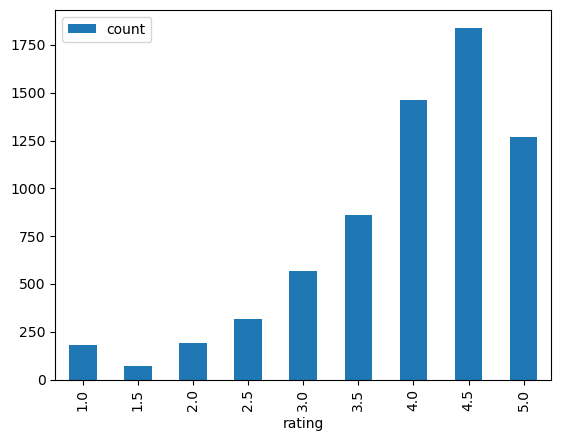

In [15]:
query = 'select rating, count(*) as count from hotel group by rating order by rating'
df = df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.bar(x='rating', y='count')

print(plot)
print(table)

╭───────────────┬─────────╮
│   star_rating │   count │
├───────────────┼─────────┤
│           0   │    3851 │
│           1   │     266 │
│           1.5 │      42 │
│           2   │     540 │
│           2.5 │     133 │
│           3   │    1350 │
│           3.5 │      41 │
│           4   │     449 │
│           4.5 │       5 │
│           5   │      81 │
╰───────────────┴─────────╯
AxesSubplot(0.125,0.11;0.775x0.77)


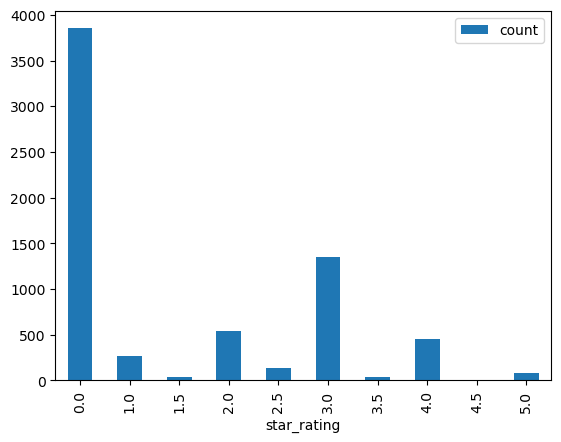

In [3]:
query = 'select star_rating, count(*) as count from hotel group by star_rating order by star_rating'
df = df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.bar(x='star_rating', y='count')

print(plot)
print(table)

╭───────────────────┬─────────╮
│   location_rating │   count │
├───────────────────┼─────────┤
│               1   │      68 │
│               1.3 │       3 │
│               1.5 │       1 │
│               1.6 │       1 │
│               1.7 │       4 │
│               1.8 │       4 │
│               1.9 │       1 │
│               2   │      44 │
│               2.1 │       2 │
│               2.2 │       9 │
│               2.3 │      12 │
│               2.4 │       7 │
│               2.5 │      31 │
│               2.6 │      10 │
│               2.7 │      22 │
│               2.8 │      21 │
│               2.9 │      18 │
│               3   │     173 │
│               3.1 │      32 │
│               3.2 │      40 │
│               3.3 │      74 │
│               3.4 │      62 │
│               3.5 │     102 │
│               3.6 │      70 │
│               3.7 │     115 │
│               3.8 │     127 │
│               3.9 │     122 │
│               4   │     503 │
│       

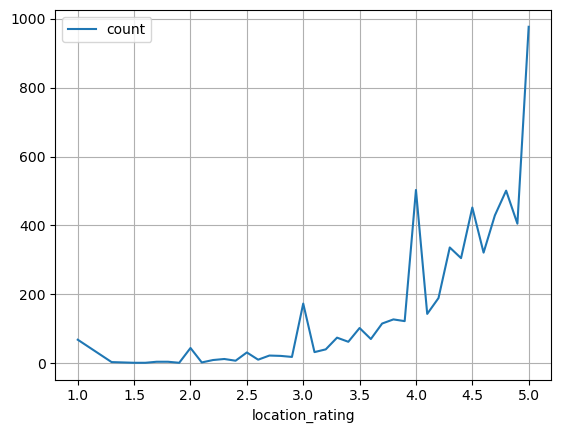

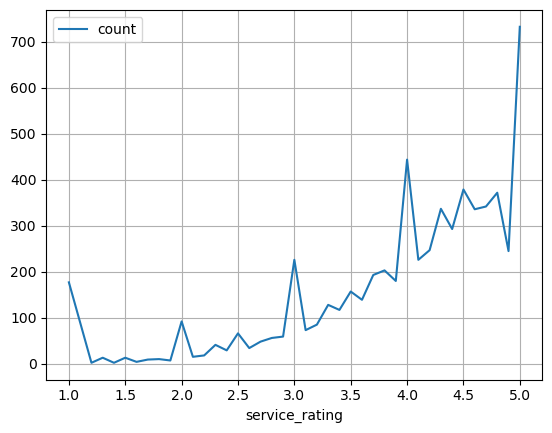

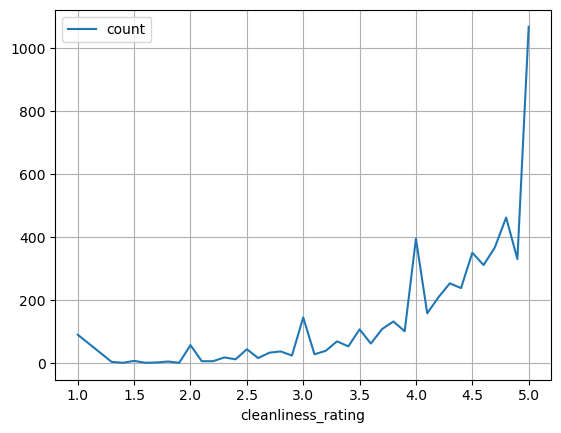

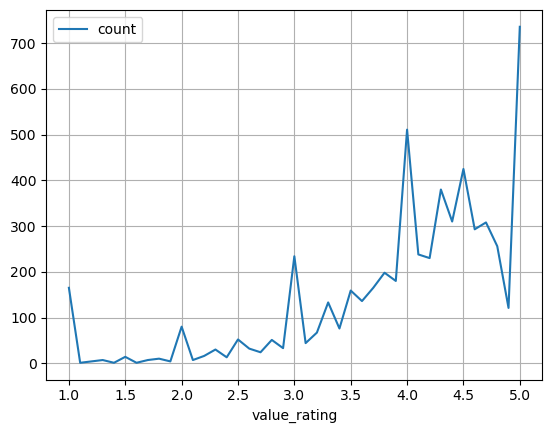

In [13]:
query = 'select location_rating, count(*) as count from hotel where location_rating != -1 group by location_rating order by location_rating'
df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.line(x='location_rating', y='count', grid=True)

print(plot)
print(table)


query = 'select service_rating, count(*) as count from hotel where service_rating != -1 group by service_rating order by service_rating'
df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.line(x='service_rating', y='count', grid=True)

print(plot)
print(table)


query = 'select cleanliness_rating, count(*) as count from hotel where cleanliness_rating != -1 group by cleanliness_rating order by cleanliness_rating'
df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.line(x='cleanliness_rating', y='count', grid=True)

print(plot)
print(table)


query = 'select value_rating, count(*) as count from hotel where value_rating != -1 group by value_rating order by value_rating'
df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.line(x='value_rating', y='count', grid=True)

print(plot)
print(table)

AxesSubplot(0.125,0.11;0.775x0.77)


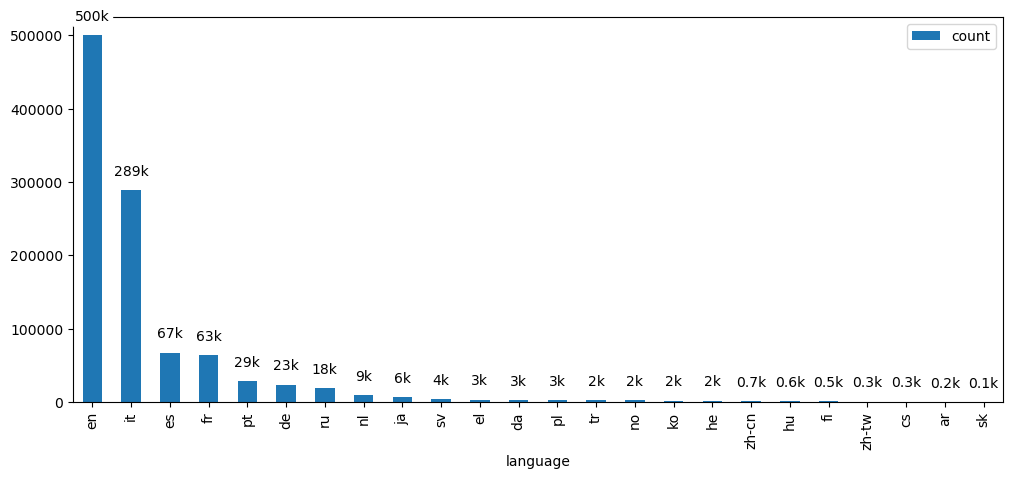

In [85]:
query = 'select language, count(*) as count from review group by language having count(*)>100 order by count desc'
df = df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.bar(x='language', y='count', figsize=(12, 5))

# add number over columns
for index, value in enumerate(df['count']):
    if value < 1000:
        count_text = '{:.1f}k'.format(value / 1000)  # Format count in 'k' with one decimal place
    else:
        count_text = '{:.0f}k'.format(value / 1000)  # Format count in 'k' without decimal places
    # plot.text(x=index, y=value+8000, s=count_text, ha='center')
    plot.text(x=index, y=value+20000, s=count_text, ha='center', color='black', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))


print(plot)
# print(table)

AxesSubplot(0.125,0.11;0.775x0.77)
╭──────────────────┬─────────╮
│   year_of_review │   count │
├──────────────────┼─────────┤
│             2002 │      71 │
│             2003 │     867 │
│             2004 │    3164 │
│             2005 │    6055 │
│             2006 │    6918 │
│             2007 │    8855 │
│             2008 │    9864 │
│             2009 │   16831 │
│             2010 │   24543 │
│             2011 │   39959 │
│             2012 │   63405 │
│             2013 │   89135 │
│             2014 │  105216 │
│             2015 │  124765 │
│             2016 │  136803 │
│             2017 │  113675 │
│             2018 │   93579 │
│             2019 │   74746 │
│             2020 │   19401 │
│             2021 │   16764 │
│             2022 │   32321 │
│             2023 │   35231 │
│             2024 │    6781 │
╰──────────────────┴─────────╯
AxesSubplot(0.125,0.11;0.775x0.77)


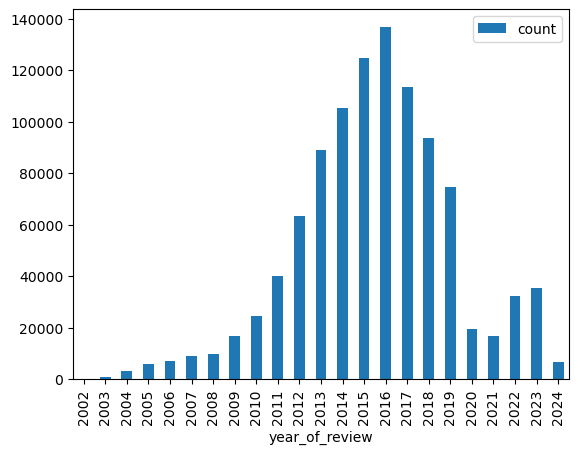

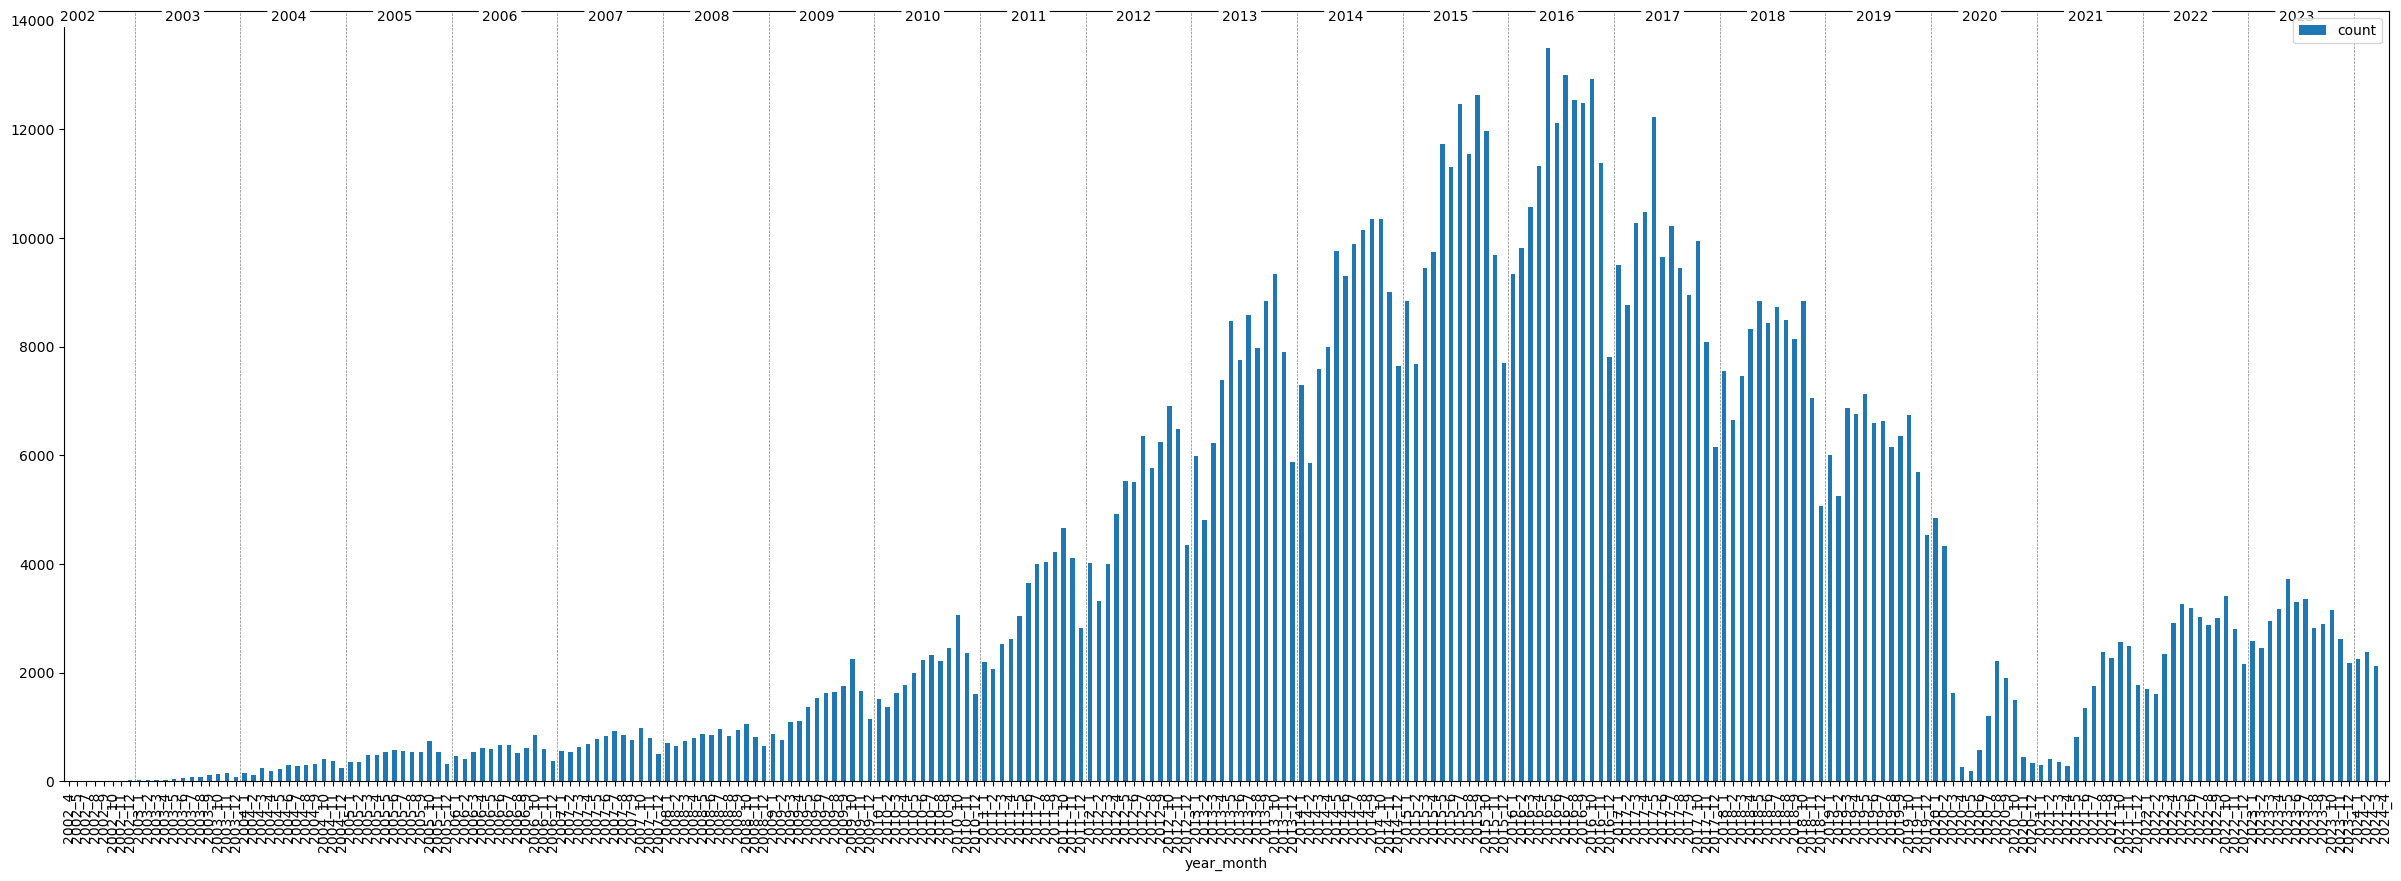

In [147]:
query = 'select year_of_review, count(*) as count from review group by year_of_review order by year_of_review'
df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.bar(x='year_of_review', y='count')

print(plot)
print(table)



query = """
    select 
        year_of_review, 
        month_of_review, 
        year_of_review||"_"||month_of_review as year_month, 
        count(*) as count 
    from 
        review 
    where
        year_of_review||"_"||month_of_review != '2024_04'
    group by 
        year_of_review, month_of_review
    order by 
        year_of_review, cast(month_of_review as int)
"""
df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.bar(x='year_month', y='count', figsize=(30, 10))

# Adding vertical lines between January and December
for i, row in df.iterrows():
    if row['year_month'].endswith('_12'):
        # lines between years
        plot.axvline(x=i+0.5, color='gray', linestyle='--', lw=0.5)
        # write the year on top
        plot.text(x=i-6, y=14000, s=row['year_of_review'], ha='center', color='black', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
 # y=row['count']+5000

print(plot)
# print(table)

AxesSubplot(0.125,0.11;0.775x0.77)
╭──────────────────────────┬─────────╮
│ category                 │   count │
├──────────────────────────┼─────────┤
│ B&B                      │    2367 │
│ Hotel                    │    1728 │
│ Guest House              │    1196 │
│ Condo                    │     367 │
│ Limited Service Property │     278 │
│ Lodge                    │     270 │
│ Inn                      │     223 │
│ Hostel                   │     178 │
│ Villa                    │      66 │
│ Pension                  │      36 │
│ Camp                     │      13 │
│ Farmhouse                │      12 │
│ Motel                    │       5 │
│ other                    │       4 │
│ Resort                   │       4 │
│ Cottage                  │       4 │
│ Ranch                    │       3 │
│ Spa                      │       2 │
│ Castle                   │       2 │
╰──────────────────────────┴─────────╯


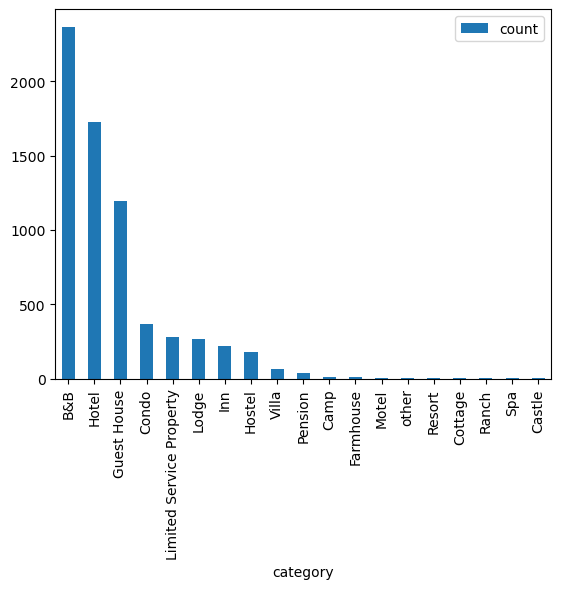

In [247]:
query = """
    select 
        case 
            when lower(category_rank) like '%guest house%' then 'Guest House'
            when lower(category_rank) like '%b&b%' then 'B&B'
            when lower(category_rank) like '%inn%' then 'Inn'
            when lower(category_rank) like '%lodge%' then 'Lodge'
            when lower(category_rank) like '%resort%' then 'Resort'
            when lower(category_rank) like '%hostel%' then 'Hostel'
            when lower(category_rank) like '%camp%' then 'Camp'
            when lower(category_rank) like '%hotel%' then 'Hotel'
            when lower(category_rank) like '%motel%' then 'Motel'
            when lower(category_rank) like '%condo%' then 'Condo'
            when lower(category_rank) like '%limited service propert%' then 'Limited Service Property'
            when lower(category_rank) like '%pension%' then 'Pension'
            when lower(category_rank) like '%villa%' then 'Villa'
            when lower(category_rank) like '%spa%' then 'Spa'
            when lower(category_rank) like '%farmhouse%' then 'Farmhouse'
            when lower(category_rank) like '%cottage%' then 'Cottage'
            when lower(category_rank) like '%ranch%' then 'Ranch'
            when lower(category_rank) like '%castle%' then 'Castle'
            else 'other'
            end as category,
        count(*) as count
    from
        hotel
    group by
        category
    order by 
        count desc
"""



df = get_df(query)

table = df.to_markdown(tablefmt='rounded_outline', index=False)
plot = df.plot.bar(x='category', y='count')
# plt.xticks(rotation=60, ha='right')


print(plot)
print(table)

In [ ]:
# average price line chart

In [ ]:
# scatter plot of review rating vs each caracteristic rating

In [ ]:
# correlation between score and amenities? Which amenities are more correlated with score?

In [ ]:
# numbers of hotels per neighborhood (as report at bootom of page hotel)

In [ ]:
# Which review get responses? Count per score

In [ ]:
connection.close()
df = None
hotel_df = None